# Introducere

Setul de date ales este "Adidas Sales Dataset": https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset  
Am ales acest set de date, pentru ca ne permite o multime de abordari asupra analizarii datelor, cu o multitudine de variabile relevante, atat calitative cat si cantitative.  
Astfel, pentru acest proiect ne-am propus sa analizam performanta vanzarilor produselor Adidas si influentele pe care le au variabilele calitative precum retailerul, orasul, categoria produsului sau data achizitiei asupra valorilor vanzarilor 
Principalele variabile din setul de date care au fost luate in considerare in analiza noastra sunt: 

**Retailerul de la care s-a facut achizitia**   
**Data facturarii achizitiei**  
**Orasul achizitiei**  
**Categoria de produs**  
**Pretul pe unitate, Numarul de produse cumparate si Pretul total al achizitiei**  
**Profitul operational si Marja de profit**  
**Metoda de achizitie**




# Instalare biblioteci

Primul pas in analiza noastra a fost in instalarea bibliotecilor Python.  
Inca de la inceputul proiectului am importat bibliotecile pandas si numpy pentru a permite importarea setului nostru de date si pentru a efectua operatii cu valorile din acesta  
Bibliotecile matplotlib si seaborn au fost adaugate odata ce am ajuns la etapa crearii de grafice
Pentru componenta de machine learning am importat componenta de regresie liniara a bibiliotecii scikit-learn pentru a face predictii in legatura cu valoarea vanzarilor viitoare

In [2]:
import pandas as pd
import numpy as np
try:
    df = pd.read_csv('adidas.csv')
except FileNotFoundError:
    print("Fisierul nu a fost gasit")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style=("darkgrid")


from sklearn.linear_model import LinearRegression


# Test  
Am verificat numarul de valori pentru fiecare coloana a tabelului(pentru a afla numarul lor si pentru a verifica daca exista celule goale)  
Am afisat Primele elemente de pe fiecare coloana pentru a avea o vedere asupra structurii setului de date  
Am afisat tipurile de date aflate pe fiecare coloana a setului de date

In [3]:
print(df.count())
print("\n")
print(df.head())
print("\n")
print(df.dtypes)

Retailer            9648
,Retailer ID         9648
,Invoice Date        9648
,Region              9648
,State               9648
,City                9648
,Product             9648
,Price per Unit      9648
,Units Sold          9648
,Total Sales         9648
,Operating Profit    9648
,Operating Margin    9648
,Sales Method        9648
,dtype: int64
,
,
,      Retailer  Retailer ID Invoice Date     Region     State      City  \
,0  Foot Locker      1185732     1/1/2020  Northeast  New York  New York   
,1  Foot Locker      1185732     1/2/2020  Northeast  New York  New York   
,2  Foot Locker      1185732     1/3/2020  Northeast  New York  New York   
,3  Foot Locker      1185732     1/4/2020  Northeast  New York  New York   
,4  Foot Locker      1185732     1/5/2020  Northeast  New York  New York   
,
,                     Product  Price per Unit  Units Sold  Total Sales  \
,0      Men's Street Footwear              50        1200       600000   
,1    Men's Athletic Footwear          

# Conversie date
Am transpus Invoice Date in formatul datetime si am transformat celelalte variabile in date numerice

In [4]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%m/%d/%Y')
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'], errors='coerce')
print(df.dtypes)

Retailer                    object
,Retailer ID                  int64
,Invoice Date        datetime64[ns]
,Region                      object
,State                       object
,City                        object
,Product                     object
,Price per Unit               int64
,Units Sold                   int64
,Total Sales                  int64
,Operating Profit           float64
,Operating Margin           float64
,Sales Method                object
,dtype: object


**tipurile de date folosite sunt corecte acum**

# Verificare si tratare valori anormale
Am verificat daca exista valori nule
Am verificat daca exista valori anormale precum pret <=0, numar de unitati vandute negativ, sau diferenta intre totalul afisat in tabel si produsul dintre unitati * pret pe unitate (pe aceasta coloana, setul de date a avut o multitudine de erori pe care le-am indreptat mai jos)  
Am tratat cazurile in care un magazin avea 0 vanzari intr-o zi, dar avea o marja de profit pentru acea zi (am inlocuit acea marja cu mediana celorlalte valori diferite de 0 de pe coloana)

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Retailer            0
,Retailer ID         0
,Invoice Date        0
,Region              0
,State               0
,City                0
,Product             0
,Price per Unit      0
,Units Sold          0
,Total Sales         0
,Operating Profit    0
,Operating Margin    0
,Sales Method        0
,dtype: int64


**Nu exista misssing values**

In [27]:
print(df[df['Price per Unit'] <= 0])
print(df[df['Units Sold'] < 0])
df['total'] = df['Price per Unit'] * df['Units Sold']
print(df[df['Total Sales'] != df['total']].head)

Empty DataFrame
,Columns: [Retailer, Retailer ID, Invoice Date, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin, Sales Method, total]
,Index: []
,Empty DataFrame
,Columns: [Retailer, Retailer ID, Invoice Date, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin, Sales Method, total]
,Index: []
,<bound method NDFrame.head of Empty DataFrame
,Columns: [Retailer, Retailer ID, Invoice Date, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin, Sales Method, total]
,Index: []>


**Nu exista situatii in care pretul sa fie mai mic sau egal cu 0, si in care cantitate vanduta sa fie mai mica decat 0.**  
**Setul de date prezinta o eroare: de o multime de ori, Total Sales si, implicit, Operating profit au o valoare de 10 ori mai mare decat ar trebui**

In [7]:
x10 = np.isclose(df['Total Sales'], df['total'] * 10)
df.loc[x10, 'Total Sales'] = df.loc[x10, 'Total Sales'] / 10
df.loc[x10, 'Operating Profit'] = df.loc[x10, 'Operating Profit'] / 10
print(df[df['Total Sales'] != df['total']])
print(df.head())

Empty DataFrame
,Columns: [Retailer, Retailer ID, Invoice Date, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin, Sales Method, total]
,Index: []
,      Retailer  Retailer ID Invoice Date     Region     State      City  \
,0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
,1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
,2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
,3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
,4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   
,
,                     Product  Price per Unit  Units Sold  Total Sales  \
,0      Men's Street Footwear              50        1200        60000   
,1    Men's Athletic Footwear              50        1000        50000   
,2    Women's Street Footwear              40        1000        40000   
,3  Women's Athletic Footwear              

**Am tratat erorile setului de date, in care jumatate din randuri aveau valorile din Total Sales si Operating Profit de 10 ori mai mari decat ar fi trebuit**

In [8]:

df.loc[df['Total Sales'] == 0, 'Operating Margin'] = 0
df.loc[df['Total Sales'] ==0,  'Operating Margin'] = df['Operating Margin'].mean()

**Pe decursul proiectului, am mai observat ca exista cazuri in care un magazin are 0 vanzari, astfel 0 profit dar marja de profit este 0.4.**  
**Am decis ca cea mai buna alegere ar fi sa inlocuim marja de profit in aceste cazuri cu mediana marjei de profit pentru restul setului de date**

# Extragerea unui subset relevant  
Am ales un subset general de date, din care am scos datele redundante (ID-ul Retailerului care are acelasi rol ca numele retailerului sau Regiunea si Statul, care se deduc din variabila Oras)

In [9]:
subset = df[['Retailer','Invoice Date','City','Product','Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method']]
print(subset.head())

      Retailer Invoice Date      City                    Product  \
,0  Foot Locker   2020-01-01  New York      Men's Street Footwear   
,1  Foot Locker   2020-01-02  New York    Men's Athletic Footwear   
,2  Foot Locker   2020-01-03  New York    Women's Street Footwear   
,3  Foot Locker   2020-01-04  New York  Women's Athletic Footwear   
,4  Foot Locker   2020-01-05  New York              Men's Apparel   
,
,   Price per Unit  Units Sold  Total Sales  Operating Profit  \
,0              50        1200        60000           30000.0   
,1              50        1000        50000           15000.0   
,2              40        1000        40000           14000.0   
,3              45         850        38250           13387.5   
,4              60         900        54000           16200.0   
,
,   Operating Margin Sales Method  
,0              0.50     In-store  
,1              0.30     In-store  
,2              0.35     In-store  
,3              0.35     In-store  
,4           

# Analiza datelor

## Analiza Profitului si marjei de profit pentru intreg setul de date

In [28]:
sumar_profit=df[['Operating Profit', 'Operating Margin']].describe()

print(sumar_profit)

       Operating Profit  Operating Margin
,count       9648.000000       9648.000000
,mean        4894.793501          0.422972
,std         4866.464372          0.097182
,min            0.000000          0.100000
,25%         1753.440000          0.350000
,50%         3262.980000          0.410000
,75%         6192.360000          0.490000
,max        39000.000000          0.800000


**Am afisat un sumar ar variabilei profitului si a marjei de profit, pe care le vom detalia mai jos**  
**Putem observa ca avem un numar de 9648 de elemente in setul nostru de date**  

**Pentru profitul brut**

**Media valorilor profitului este de 4894\$**  
**Abaterea Standard este de 4866\$**  
**Aici putem face prima observatie, abaterea standard este extrem de apropiata de medie, ceea ce inseamna ca avem o imprastiere foarte mare a datelor**

**Valoarea minima este de 0**  
**Valoarea maxima este de 39.000**  

**Valorile quartilelor Q1=1753, Q2(Mediana)=3262 si Q3=6192 sunt situate semnificativ mai aproape de valoarea minima decat de valoarea maxima**   
**Se poate observa si ca media este mult mai mare decat mediana**  
**Astfel, putem ajunge la concluzia ca exista un numar semnificativ de outlieri unde profitul ia valori uriase, care atrag media spre o valoare mult mai mare decat tendinta centrala**  

**In cazul marjei de profit,**  
**valorile sunt mult mai grupate ( o abatere standard mai mica),**  
**media este extrem de aproape de mediana, ceea ce indica o distributie simetrica a datelor**  

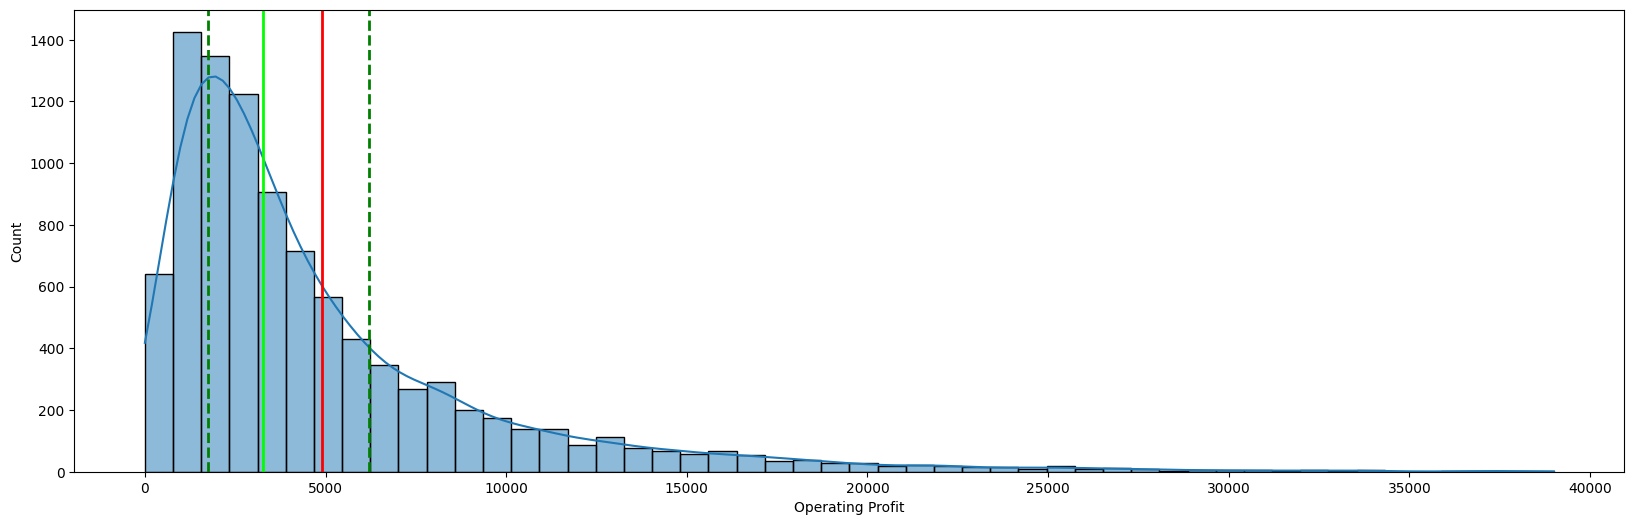

In [11]:
media = df['Operating Profit'].mean()
q1 = df['Operating Profit'].quantile(0.25)
mediana = df['Operating Profit'].quantile(0.50)
q3 = df['Operating Profit'].quantile(0.75)


plt.figure(figsize=(20, 6))
sns.histplot(df['Operating Profit'], bins=50, kde=True)
plt.axvline(media, color='red', linestyle='-', linewidth=2, label="Media")
plt.axvline(q1, color='green', linestyle='--', linewidth=2, label='Quartila' )
plt.axvline(mediana, color='lime', linestyle='-', linewidth=2, label='Mediana')
plt.axvline(q3, color='green', linestyle='--', linewidth=2, label='Quartila 3')



**In graficul de mai sus se poate observa distributia asimetrica a valorilor profitului pentru setul de date, cu 75% din valori situate intre 0 si 6192, iar 25% dintre ele intre 6192 si 39000**  
**Reprezinta o metoda buna pentru a vizualiza impactul outlierilor si valorilor extreme asupra mediei, atragand-o spre o valoare mult mai mare decat tendinta centrala**

                           Operating Margin  Operating Profit  Product  \
,Product                                                                  
,Men's Street Footwear                  0.45       11629045.62     1610   
,Women's Apparel                        0.44        9685220.56     1608   
,Women's Athletic Footwear              0.41        5597822.44     1606   
,Men's Apparel                          0.40        6381405.33     1606   
,Men's Athletic Footwear                0.40        7437456.94     1610   
,Women's Street Footwear                0.40        6494016.81     1608   
,
,                           Total Sales  Units Sold  
,Product                                             
,Men's Street Footwear         27680769      593320  
,Women's Apparel               23870985      433827  
,Women's Athletic Footwear     14315521      317236  
,Men's Apparel                 16520632      306683  
,Men's Athletic Footwear       20577180      435526  
,Women's Street Footw

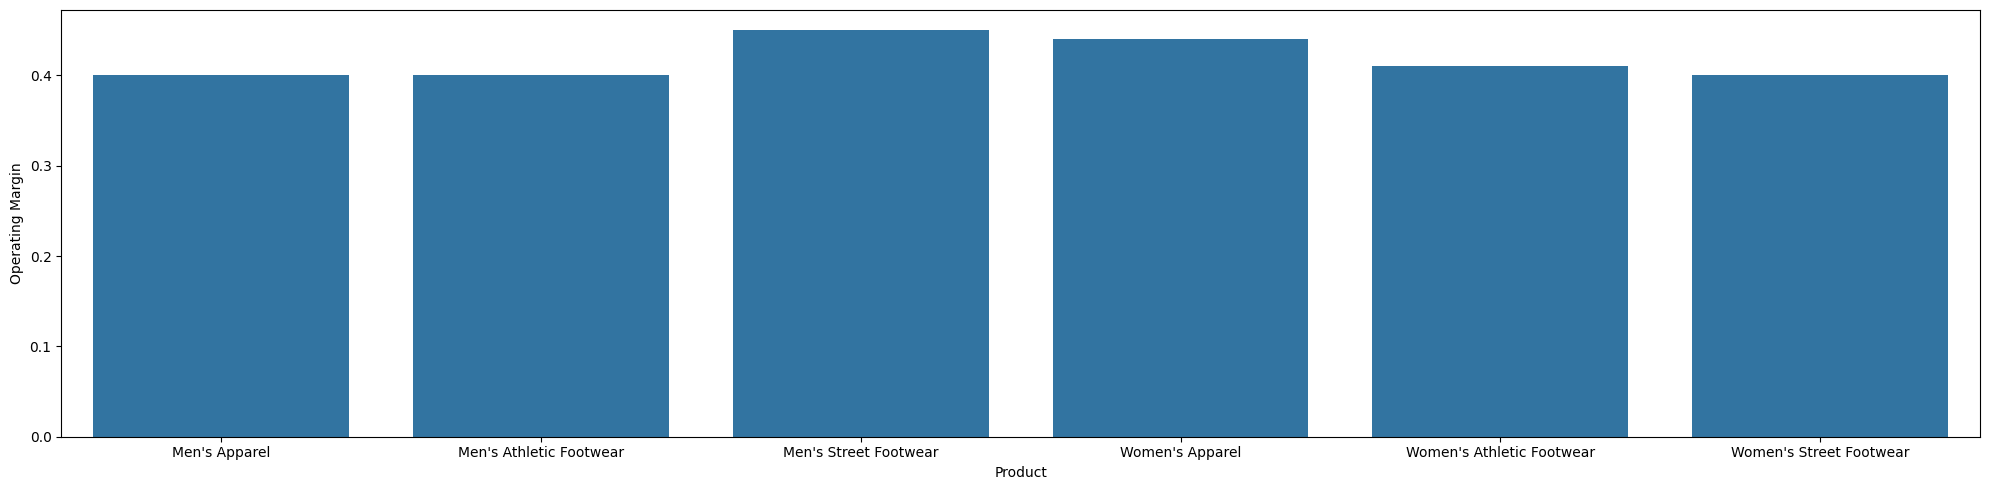

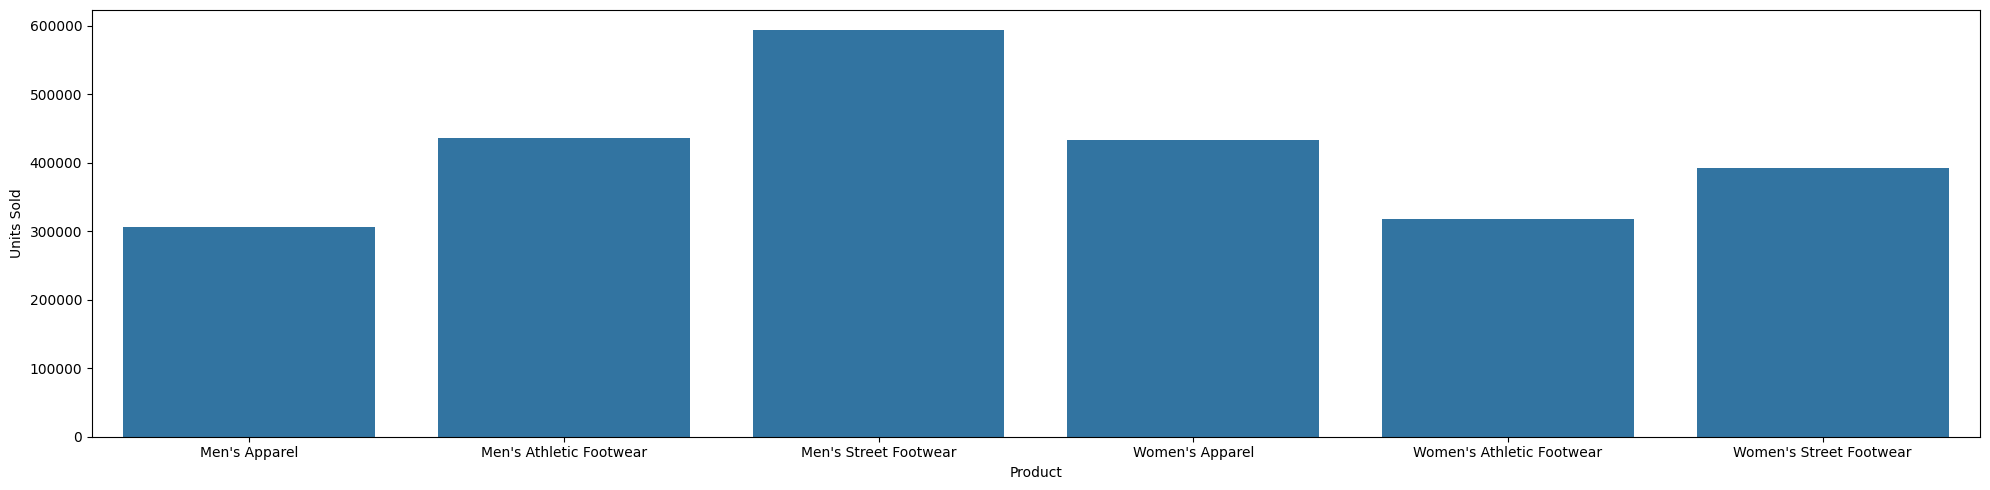

In [12]:
pivot_margin = pd.pivot_table(subset, 
                                           values=[ 'Operating Profit','Operating Margin','Total Sales', 'Units Sold'], 
                                           index='Product', 
                                           aggfunc={
                                               'Total Sales': 'sum',
                                               'Units Sold': 'sum',
                                               'Operating Profit':'sum',
                                               'Operating Margin':'median',
                                               

                                                'Product':'count'})

print(pivot_margin.sort_values(by='Operating Margin', ascending=False))

plt.figure(figsize=(20, 5))
ax = sns.barplot(
    x=pivot_margin.index,
    y=pivot_margin['Operating Margin'],)
plt.tight_layout()

plt.figure(figsize=(20, 5))
ax = sns.barplot(
    x=pivot_margin.index,
    y=pivot_margin['Units Sold'],)
plt.tight_layout()



**Am creat un tabel pivot pentru a observa ce valori pot lua marja de profit, profitul total si vanzarile totale pentru fiecare categorie de produs**  
**Dupa aceea, am creat 2 barploturi pentru a vizualiza diferentele Marjei de profit mediane si a Unitatilor totale vandute de la o categorie de produs la alta**
**Se poate observa cum Men's Street Footwear are atat cea mai mare marja de profit, cat si cel mai mare numar de unitati vandute**

## Analiza Retaileri

In [13]:
pd.set_option('display.max_rows', None)
descriptive_stats = subset.groupby('Retailer')[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']].describe()
print(descriptive_stats)

              Price per Unit                                                \
,                       count       mean        std   min   25%   50%   75%   
,Retailer                                                                     
,Amazon                 949.0  48.759747  11.832303  19.0  40.0  50.0  56.0   
,Foot Locker           2637.0  44.784983  13.533961   9.0  35.0  45.0  53.0   
,Kohl's                1030.0  44.608738  11.810840   9.0  38.0  45.0  52.0   
,Sports Direct         2032.0  42.046752  12.860241   7.0  33.0  41.0  50.0   
,Walmart                626.0  47.183706  18.220949   8.0  35.0  45.0  59.0   
,West Gear             2374.0  46.737995  17.689258   7.0  34.0  46.0  60.0   
,
,                     Units Sold              ... Total Sales           \
,                 max      count        mean  ...         75%      max   
,Retailer                                     ...                        
,Amazon          80.0      949.0  208.630137  ...    14375.00  618

**Conform statisticii de mai sus, observăm că liderii la profit sunt West Gear și Sports Direct, având cel mai mare profit mediu pe vânzare.Se remarcă și strategiile diferite: Amazon are un profit mai mic, dar constant, iar Walmart are un profit neregulat și imprevizibil**

In [14]:
pivot_total_performance = pd.pivot_table(subset, 
                                           values=['Total Sales', 'Operating Profit'], 
                                           index='Retailer', 
                                           aggfunc='sum')

print(pivot_total_performance.sort_values(by='Total Sales', ascending=False))

               Operating Profit  Total Sales
,Retailer                                    
,West Gear           12196890.68     32409558
,Foot Locker         11317027.31     29024945
,Sports Direct       10641608.71     24616622
,Kohl's               5182260.08     13512453
,Walmart              3902748.86     10506085
,Amazon               3984432.06     10096987


**Conform tabelului pivot, liderii absoluti in vanzari si profit operational sunt West Gear, Foot Locker si Sports Direct. Celalalt grup, format din Kohl's, Walmart si Amazon, reprezinta plutonul urmaritor, avand vanzari chiar si cu peste 50% mai mici decat ale liderilor.**

In [15]:
## Analiza metodelor de vanzare pentru fiecare retailer
pivot_sales_method = pd.pivot_table(subset, 
                                      values='Total Sales', 
                                      index='Retailer', 
                                      columns='Sales Method', 
                                      aggfunc='sum',
                                      fill_value=0)

pivot_sales_method['Total'] = pivot_sales_method.sum(axis=1)
pivot_sales_method_sorted = pivot_sales_method.sort_values(by='Total', ascending=False)
print(pivot_sales_method_sorted)

Sales Method   In-store    Online   Outlet     Total
,Retailer                                            
,West Gear      15672650   9503966  7232942  32409558
,Foot Locker     7652500  12233565  9138880  29024945
,Sports Direct   5504850  10013772  9098000  24616622
,Kohl's          2956625   5396679  5159149  13512453
,Walmart         1641125   3169694  5695266  10506085
,Amazon          2236625   4647981  3212381  10096987


**Din tabelul pivot de mai sus observam ca West Gear este lider la vanzarile de tip "In-store", in timp ce Foot Locker il depaseste la vanzarile "Online" si "Outlet". Per total, datorita vanzarilor foarte mari din magazine, West Gear are vanzari totale cu peste 3 milioane mai mari decat Foot Locker. De asemenea in afara de West Gear, majoritatea retailerilor se bazeaza mai mult pe vanzarile online si de tip outlet.**

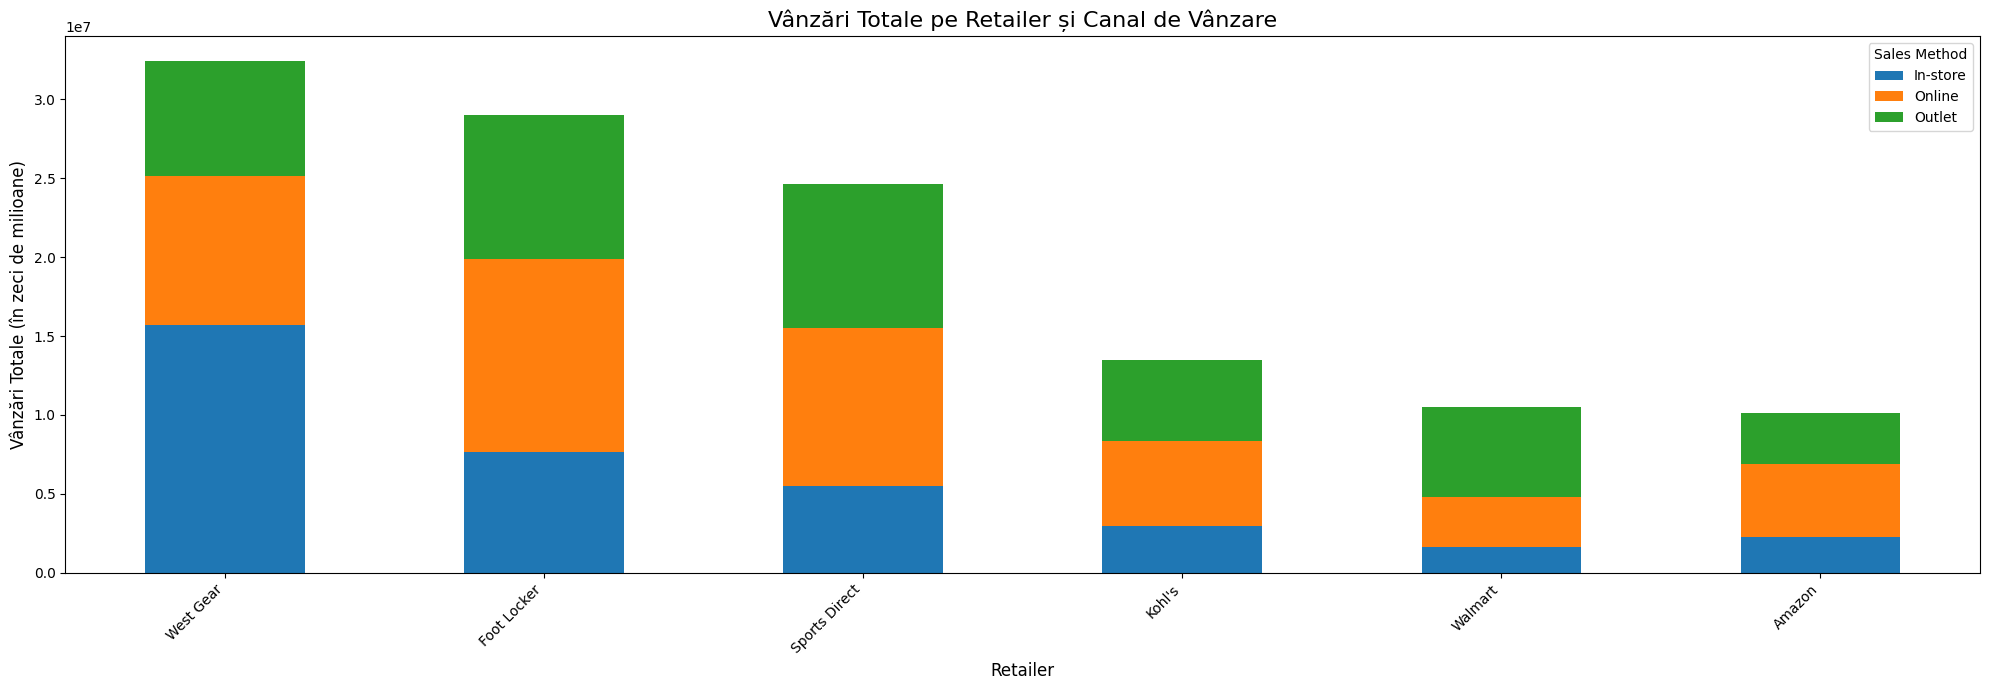

In [16]:
data_for_plot = pivot_sales_method_sorted.drop(columns='Total')

data_for_plot.plot(kind='bar', stacked=True, figsize=(20, 7))

plt.title('Vânzări Totale pe Retailer și Canal de Vânzare', fontsize=16)
plt.xlabel('Retailer', fontsize=12)
plt.ylabel('Vânzări Totale (în zeci de milioane)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

**Am creat acest grafic de tip bar plot pentru a vizualiza mai usor structura vanzarilor la fiecare retailer. Astfel, se poate observa intuitiv care este ponderea fiecarei metode de vanzare (In-store, Online, Outlet) in totalul incasarilor.**

In [17]:
pivot_products = pd.pivot_table(subset, 
                                index=['Retailer', 'Product'], 
                                values=['Total Sales', 'Units Sold'], 
                                aggfunc='sum',
                                fill_value=0)

pivot_products_sorted = pivot_products.sort_values(by=['Retailer', 'Total Sales'], ascending=[True, False])
print(pivot_products_sorted)

                                         Total Sales  Units Sold
,Retailer      Product                                           
,Amazon        Men's Street Footwear          2877127       54883
,              Women's Apparel                2034014       35885
,              Men's Athletic Footwear        1562959       31987
,              Men's Apparel                  1364520       24062
,              Women's Street Footwear        1223862       28629
,              Women's Athletic Footwear      1034505       22544
,Foot Locker   Men's Street Footwear          7538775      159081
,              Women's Apparel                5682864      104489
,              Men's Athletic Footwear        4827415      103767
,              Men's Apparel                  3883745       71543
,              Women's Street Footwear        3873147       92385
,              Women's Athletic Footwear      3218999       73104
,Kohl's        Men's Street Footwear          2948898       66844
,          

**O analiza scurta a vanzarilor pe produs arata ca "Men's Street Footwear" este principalul produs vandut de catre toti retailerii. La polul opus, cel mai putin vandut produs este "Women's Athletic Footwear".**

In [29]:
if 'YearMonth' not in subset.columns:
    subset['YearMonth'] = subset['Invoice Date'].dt.to_period('M')
pivot_temporal = pd.pivot_table(subset,
                                values='Total Sales',
                                index='YearMonth',
                                columns='Retailer',
                                aggfunc='sum',
                                fill_value=0)
print(pivot_temporal)

Retailer    Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
,YearMonth                                                                  
,2020-01          0      1399680        0              0        0     913066
,2020-02          0       714912        0              0        0    1425901
,2020-03          0      1470219        0              0        0    1003983
,2020-04          0        98112        0              0  1228842    1866127
,2020-05          0       137761        0         263485   633473    1130045
,2020-06          0            0        0              0        0    1084194
,2020-07          0            0        0         473973   106040    1602375
,2020-08          0       778120        0         365618  1155962     341930
,2020-09          0       296177        0         323035   866702     881772
,2020-10          0       153373        0         562240   712956          0
,2020-11          0       372083        0              0        0     795967


**Analiza celor doi ani din setul de date arata clar ca 2021 a fost un an net superior lui 2020 pentru toti retailerii cu vanzari inregistrate.
Foot Locker si West Gear au avut vanzari consistente pe parcursul perioadei, insa varful absolut de vanzari lunare nu le apartine. Acesta a fost atins de Sports Direct, cu o performanta de 4 milioane intr-o singura luna, in ciuda faptului ca nu a avut vanzari la inceputul lui 2020**  
**Fiecare retailer a avut o scurta perioada de inactivitate, insa Amazon si Kohl's nu au avut nicio activitate pentru anul 2022**  


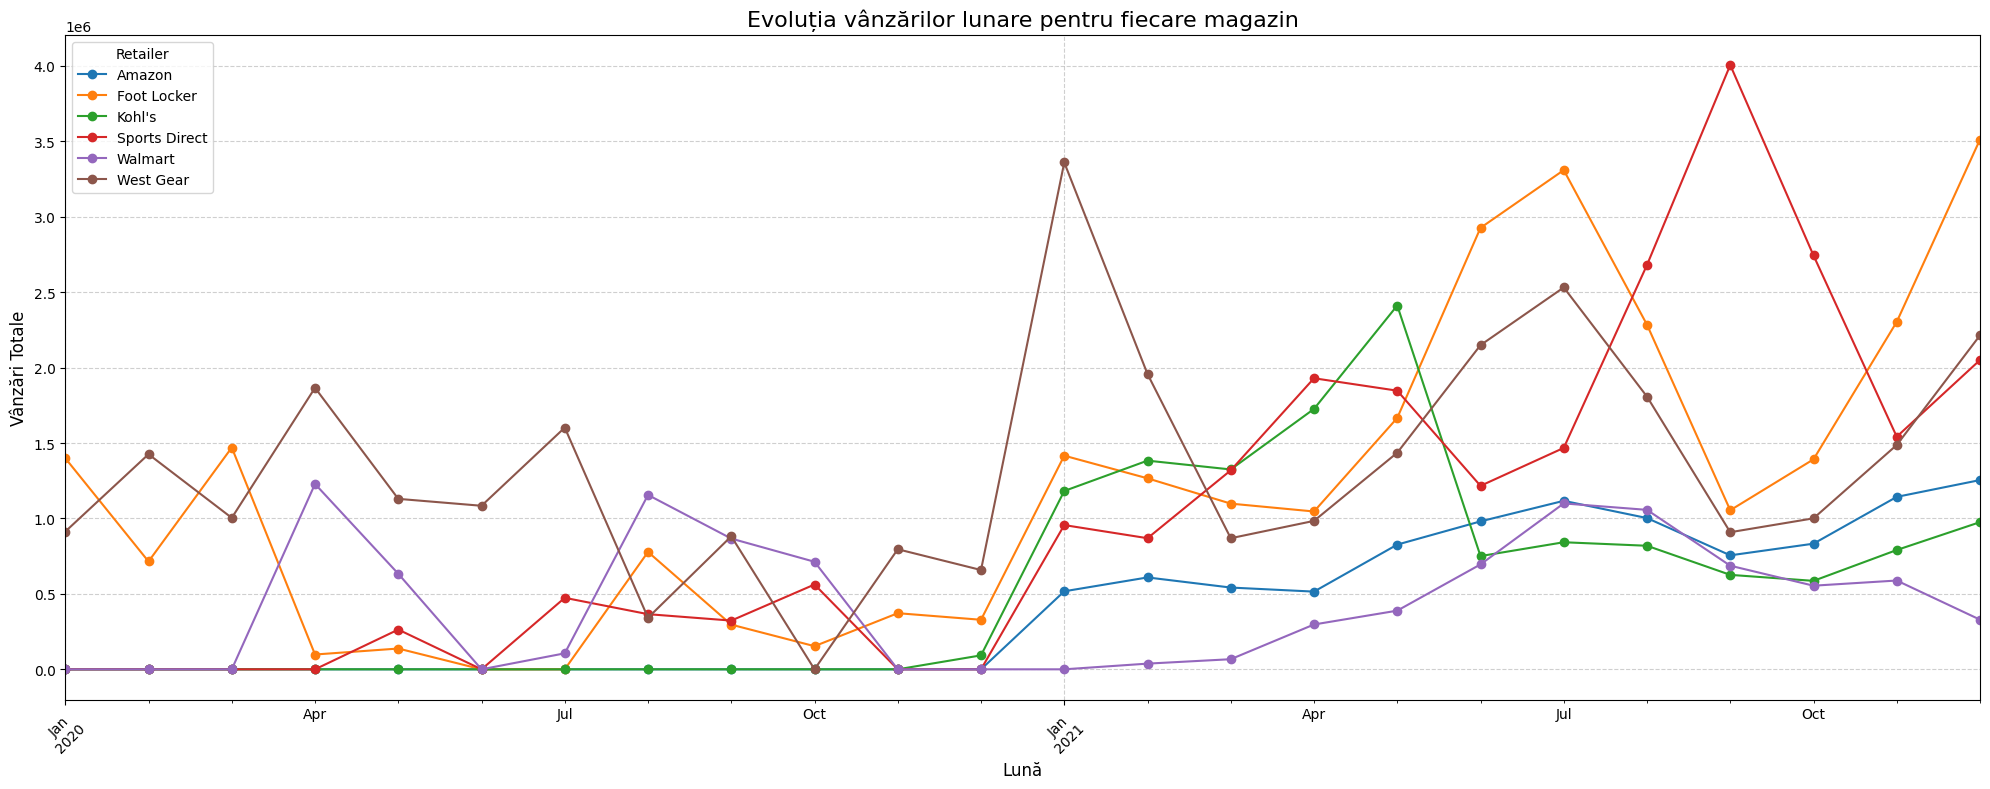

In [19]:


data_for_line_plot = pivot_temporal

data_for_line_plot.plot(kind='line', figsize=(20, 8), marker='o')


plt.title('Evoluția vânzărilor lunare pentru fiecare magazin', fontsize=16)
plt.xlabel('Lună', fontsize=12)
plt.ylabel('Vânzări Totale', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Retailer')
plt.tight_layout()
plt.show()

**Acest grafic de tip line chart ne ajută să observăm cu ușurință atât evoluția generală a vânzărilor, cât și comportamentul lor sezonier pe parcursul anilor. Se poate observa o tendinta generala de crestere de la finalul anului 2020. Concomitent, atunci au patruns pe piata si Amazon si Kohl's.**

## Analiza vanzarilor lunare

**Acest script ofera o analiza completa a vanzarilor, ajutandu-ne sa vizualizam evolutia lunara a fiecarui produs.**  
**Functionalitatea sa principala este de a calcula totalul vanzarilor pentru fiecare produs intr-un an specific, de a sintetiza aceste date intr-un tabel pivot si, in final, de a prezenta totul sub forma unui grafic de tip linie care arata clar tendintele in timp.**

Tabel pivot pentru vanzarile de produse in anul 2020
,Product  Men's Apparel  Men's Athletic Footwear  Men's Street Footwear  \
,Luna                                                                     
,1               326362                   377583                 544120   
,2               326016                   438053                 410476   
,3               308592                   449299                 515790   
,4               502349                   538944                 688594   
,5               391951                   370195                 411262   
,6               104088                   189717                 224950   
,7               294696                   393292                 484221   
,8               402807                   559961                 431109   
,9               358849                   347893                 445151   
,10              216862                   201790                 259287   
,11              123313                   22924

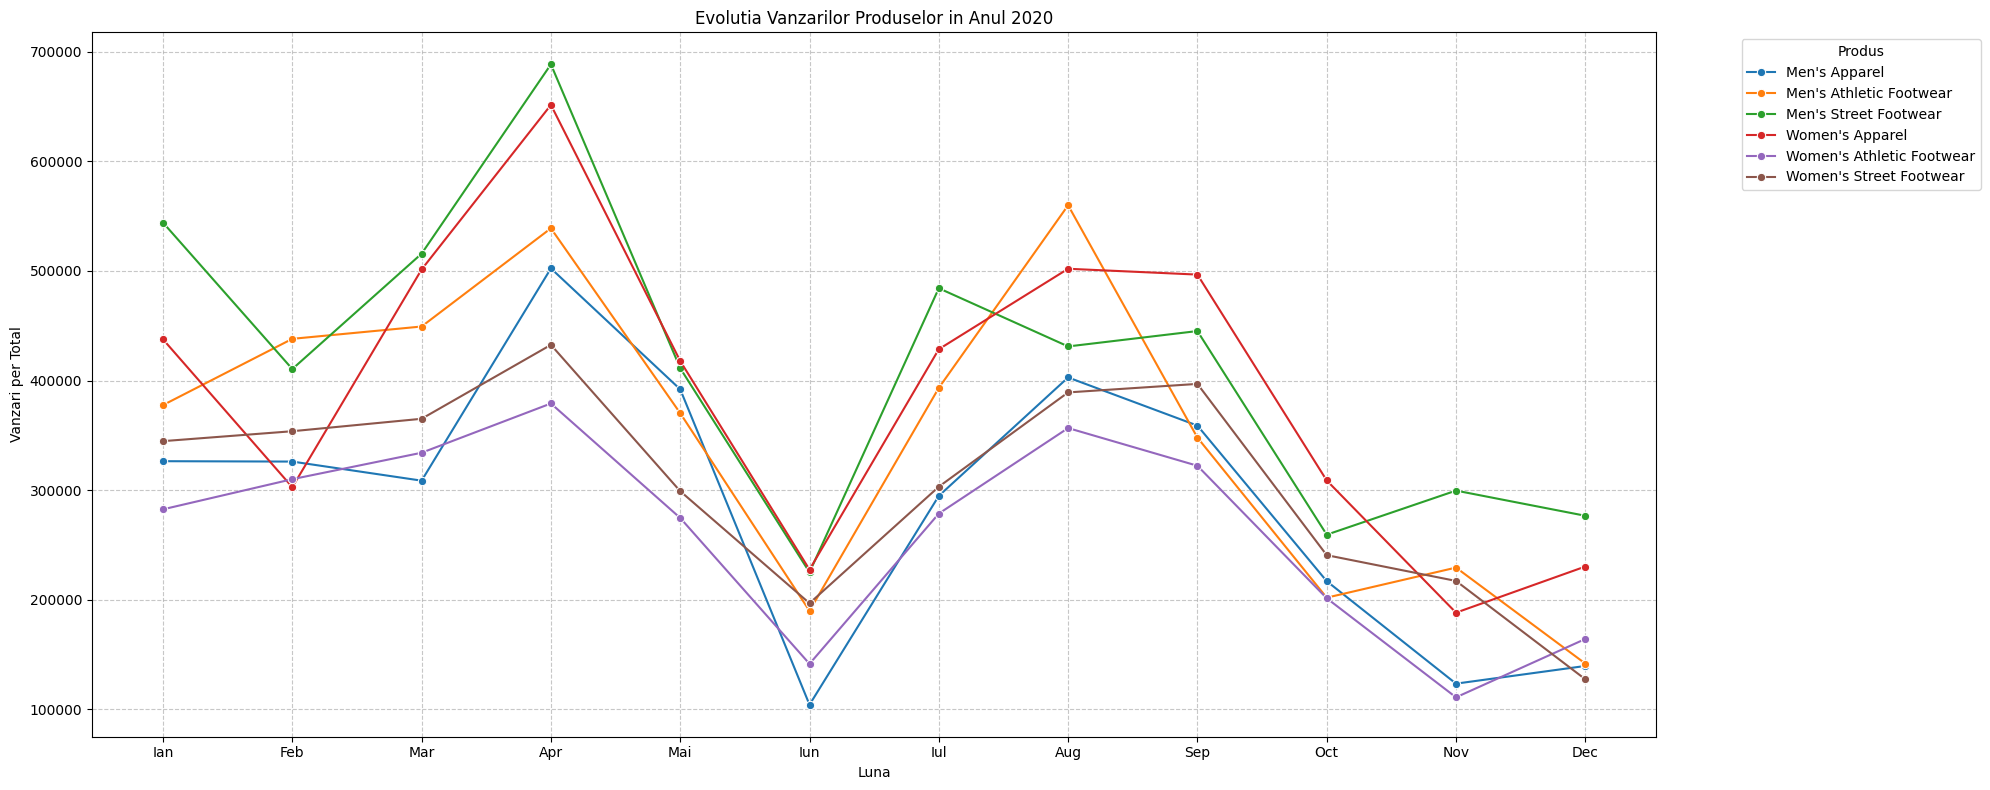

In [20]:





subset_2020 = subset[subset['Invoice Date'].dt.year == 2020].copy()
subset_2020['Luna']=subset['Invoice Date'].dt.month
vanzari_lunare_produse_2020 = subset_2020.groupby(['Luna','Product'])['Total Sales'].sum().reset_index()


pivot_2020 = pd.pivot_table(subset_2020,
                                values='Total Sales',
                                index='Luna',
                                columns='Product',
                                aggfunc='sum',
                                fill_value=0)
print("Tabel pivot pentru vanzarile de produse in anul 2020")
print(pivot_2020)


plt.figure(figsize=(20, 8))
sns.lineplot(
    data=vanzari_lunare_produse_2020,
    x='Luna',
    y='Total Sales',
    hue='Product',  
    marker='o'
    )
plt.title('Evolutia Vanzarilor Produselor in Anul 2020')
plt.xlabel('Luna')
plt.ylabel('Vanzari per Total')
plt.xticks(range(1, 13), ['Ian', 'Feb', 'Mar', 'Apr', 'Mai', 'Iun', 'Iul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Produs', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()




**Se observa o explozie a vanzarilor in luna aprilie, cand majoritatea produselor ating valoarea maxima.**  
**Lider pe majoritatea perioadei anului fiind "Men's Street Footwear"**  
**Dupa aceea, urmeaza o scadere drastica la inceputul verii, urmata de o redresare in lunile august-septembrie.**
**Aceasta crestere nu depaseste insa varful atins in aprilie.** 
**In concluzie, cele mai importante perioade pentru vanzari sunt primavara si inceputul toamnei.**

Tabel pivot pentru vanzarile de produse in anul 2021
,Product  Men's Apparel  Men's Athletic Footwear  Men's Street Footwear  \
,Luna                                                                     
,1              1074431                  1410053                1560200   
,2               915792                  1047589                1500934   
,3               708175                   899022                1273838   
,4               822878                  1060055                1533503   
,5              1141146                  1348188                2067956   
,6              1140932                  1292886                2012344   
,7              1434600                  1724613                2533907   
,8              1169902                  1870916                2468905   
,9              1010730                  1568600                1912055   
,10              935383                  1236843                1661147   
,11             1257848                  112704

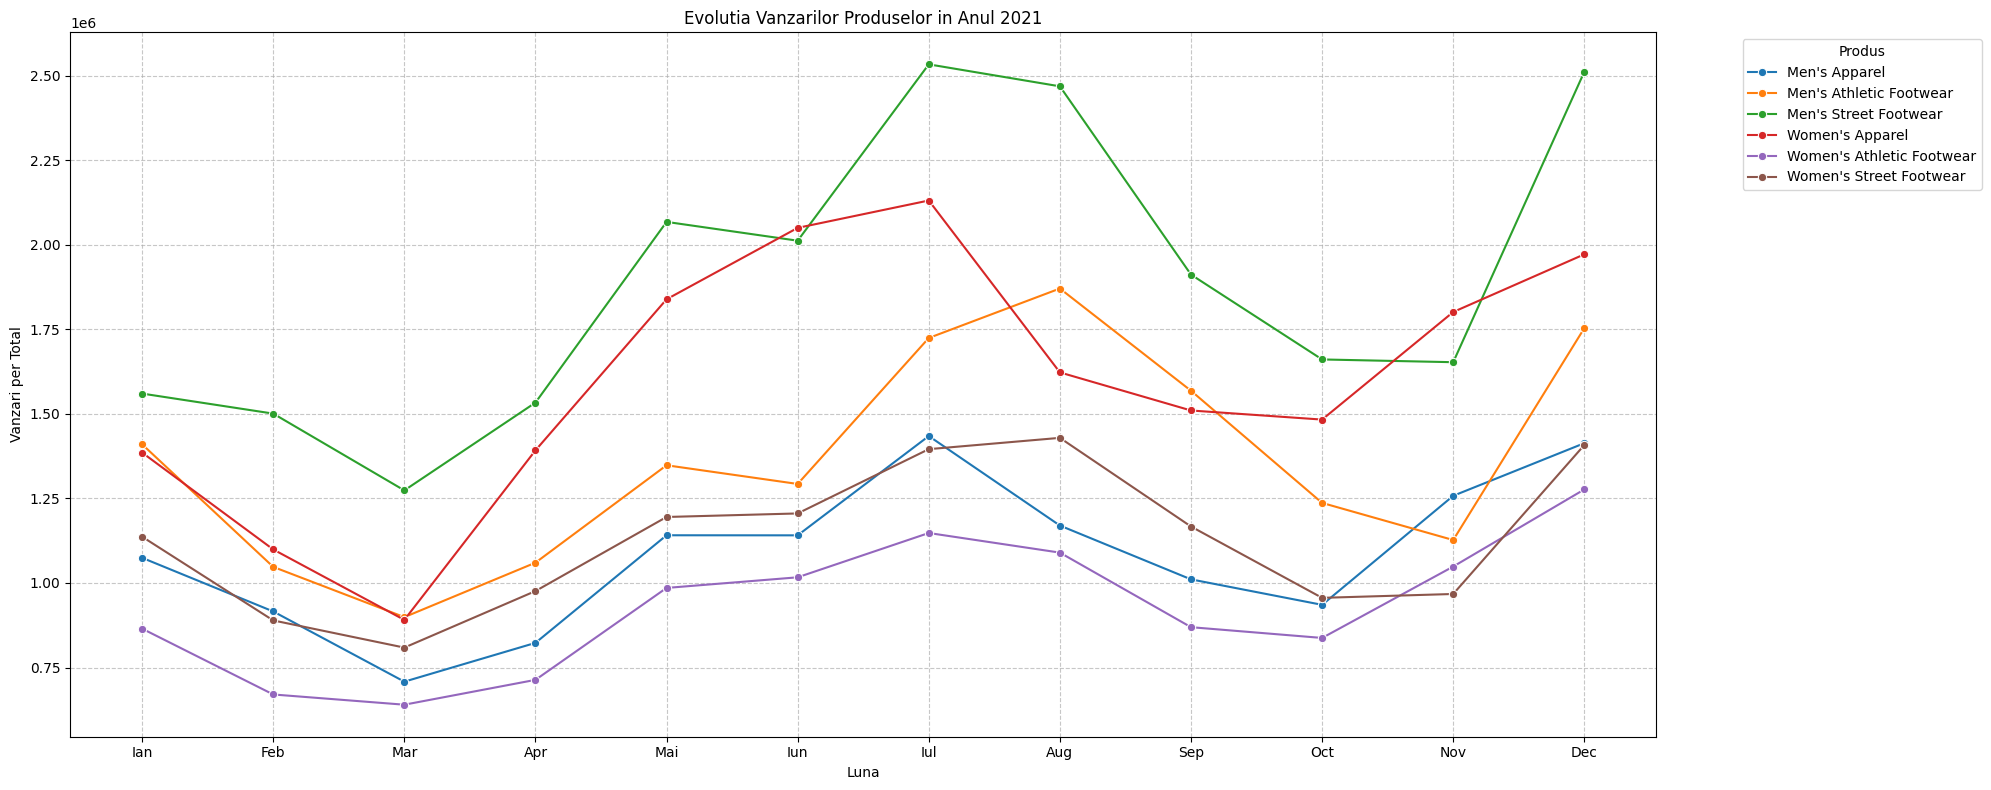

In [21]:


subset_2021 = subset[subset['Invoice Date'].dt.year == 2021].copy()
subset_2021['Luna']=subset['Invoice Date'].dt.month
vanzari_lunare_produse_2021 = subset_2021.groupby(['Luna','Product'])['Total Sales'].sum().reset_index()


pivot_2021 = pd.pivot_table(subset_2021,
                                values='Total Sales',
                                index='Luna',
                                columns='Product',
                                aggfunc='sum',
                                fill_value=0)
print("Tabel pivot pentru vanzarile de produse in anul 2021")
print(pivot_2021)



plt.figure(figsize=(20, 8))
sns.lineplot(
    data=vanzari_lunare_produse_2021,
    x='Luna',
    y='Total Sales',
    hue='Product',  
    marker='o'
    )
plt.title('Evolutia Vanzarilor Produselor in Anul 2021')
plt.xlabel('Luna')
plt.ylabel('Vanzari per Total')
plt.xticks(range(1, 13), ['Ian', 'Feb', 'Mar', 'Apr', 'Mai', 'Iun', 'Iul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Produs', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

**In anul 2021, observam un model de vanzari complet schimbat si cu un succes mult mai mare decat cel din 2020.**  
**Cifrele de afaceri au explodat, inregistrand cresteri de pana la 300% in perioadele de varf.**  
**Liderul ramanand aceelasi "Men's Street Footwear".**  
**Apogeul vanzarilor s-a mutat din primavara in luna iulie, iar finalul anului a devenit profitabil, marcand o crestere puternica in contrast cu scaderea din anul precedent.**  

## Analiza in functie de orase

In [22]:
top_cities_by_sales = subset.groupby('City')['Total Sales'].sum().sort_values(ascending=False).head(5)

top_cities_data = subset[subset['City'].isin(top_cities_by_sales.index)]
detailed_breakdown = top_cities_data.groupby(['City', 'Sales Method'])['Total Sales'].sum()

print("Analiza a vanzarilor pentru top 5 orase in functie de metoda\n")

all_methods = ['In-store', 'Online', 'Outlet']

for city in top_cities_by_sales.index:
    total_sales_for_city = top_cities_by_sales.loc[city]
    
    
    print(f"{city} (Total general: {total_sales_for_city:,} $)")
    
    for method in all_methods:
        sales = detailed_breakdown.get((city, method), 0)
        
        print(f"   - {method}: {int(sales):,} $")
    
    print()

Analiza a vanzarilor pentru top 5 orase in functie de metoda
,
,New York (Total general: 5,676,160 $)
,   - In-store: 354,750 $
,   - Online: 976,371 $
,   - Outlet: 4,345,039 $
,
,San Francisco (Total general: 4,929,220 $)
,   - In-store: 0 $
,   - Online: 858,868 $
,   - Outlet: 4,070,352 $
,
,Charleston (Total general: 4,904,272 $)
,   - In-store: 1,042,000 $
,   - Online: 3,862,272 $
,   - Outlet: 0 $
,
,Portland (Total general: 4,176,777 $)
,   - In-store: 2,033,625 $
,   - Online: 763,920 $
,   - Outlet: 1,379,232 $
,
,Orlando (Total general: 3,946,476 $)
,   - In-store: 2,099,750 $
,   - Online: 682,451 $
,   - Outlet: 1,164,275 $
,


**Aceasta analiza are rolul de a identifica primele 5 orase din punct de vedere al veniturilor totale si de a identifca sursa/metoda din care aceste venituri provin**  
**Cele 3 surse pe care le avem in setul de date sunt: outlet, online si In-store** 
**Astfel putem identifca care este principala metoda din fiecare oras**

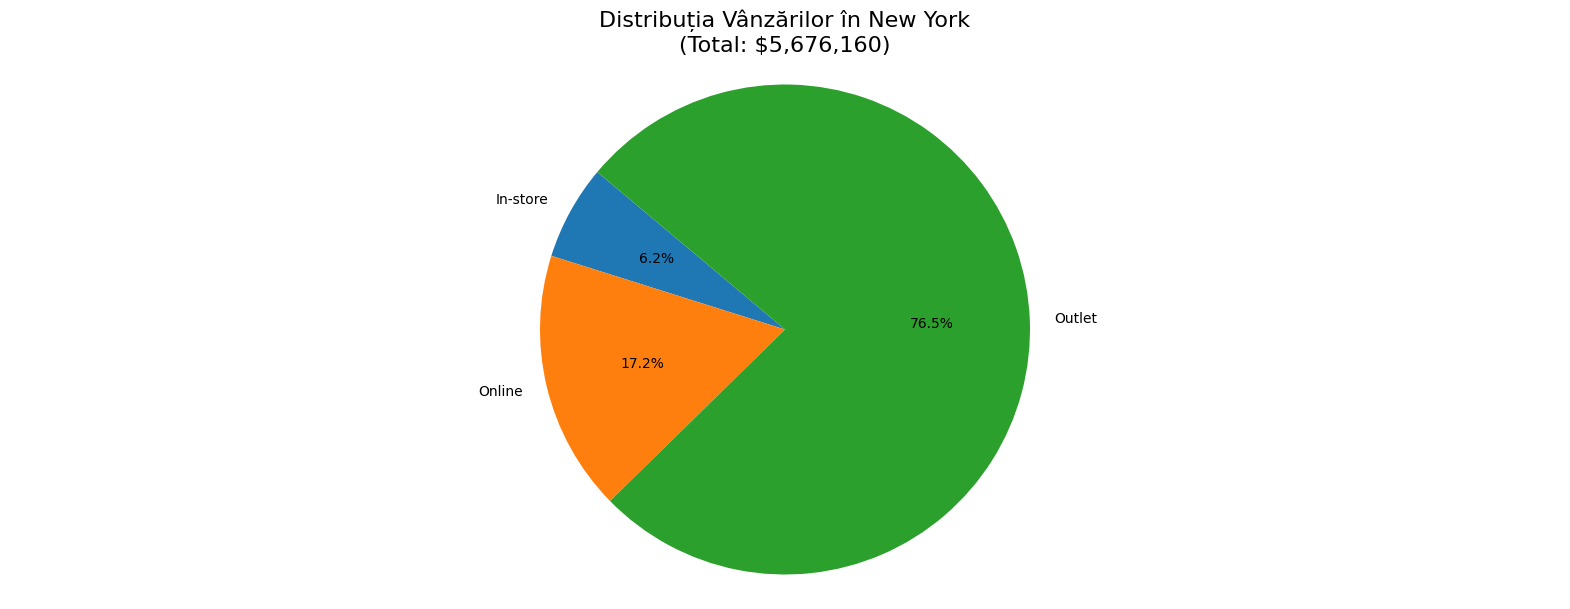

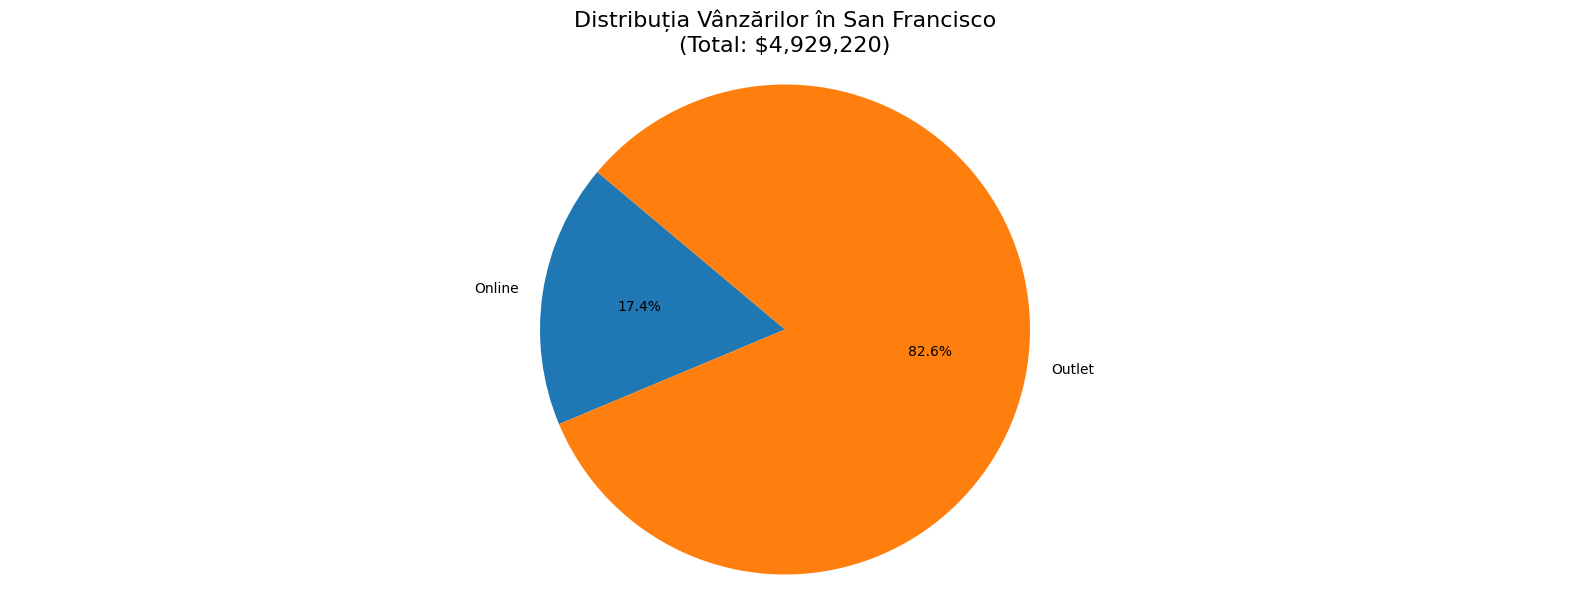

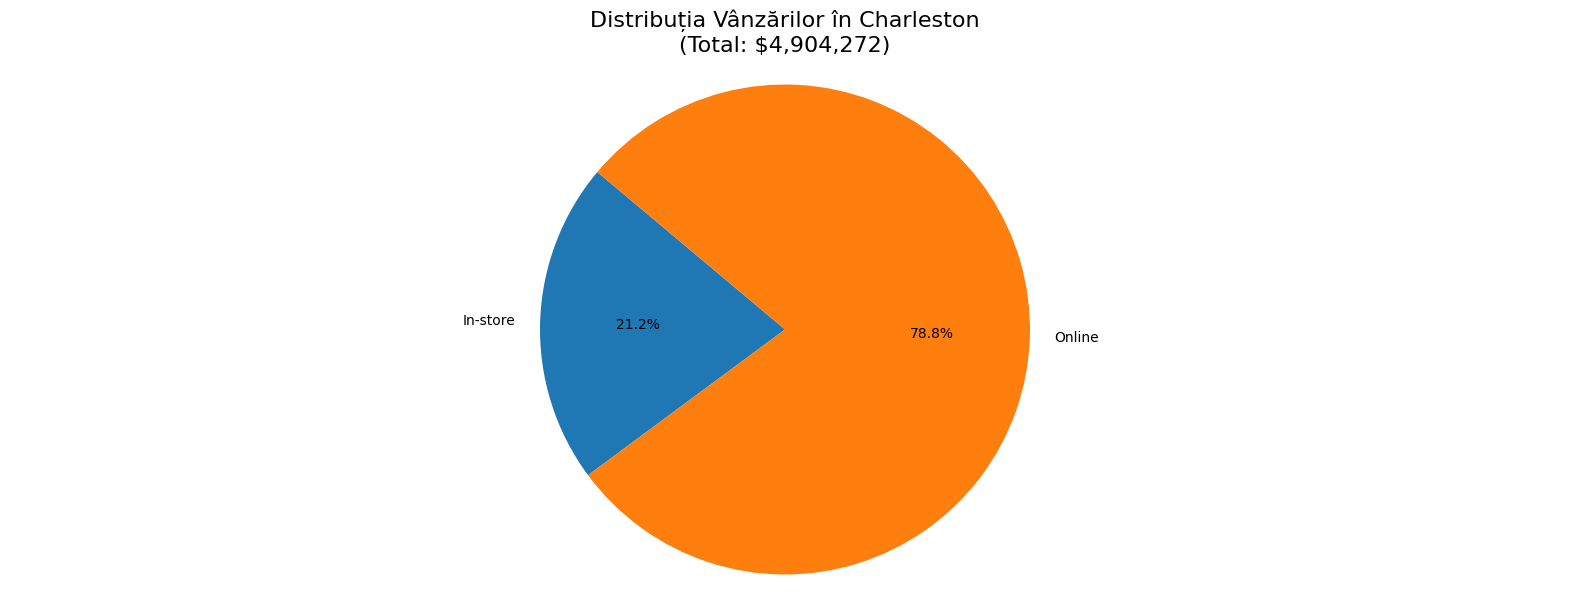

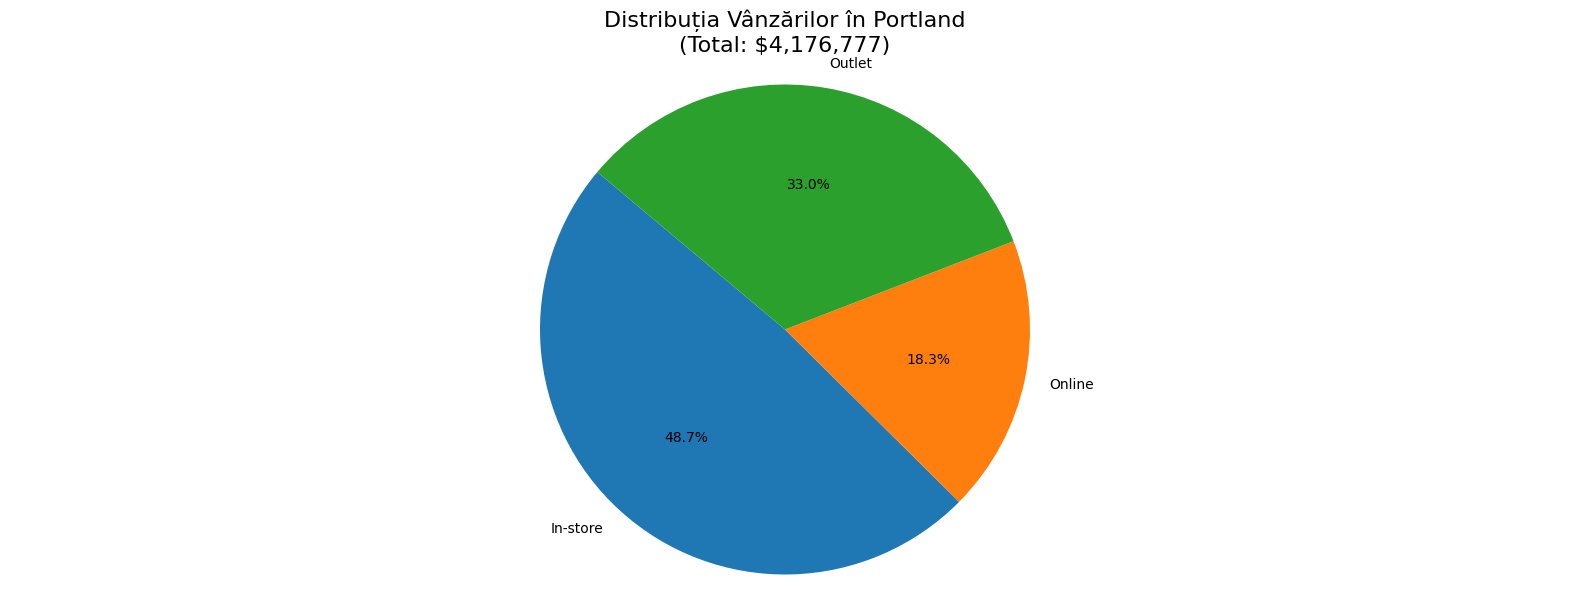

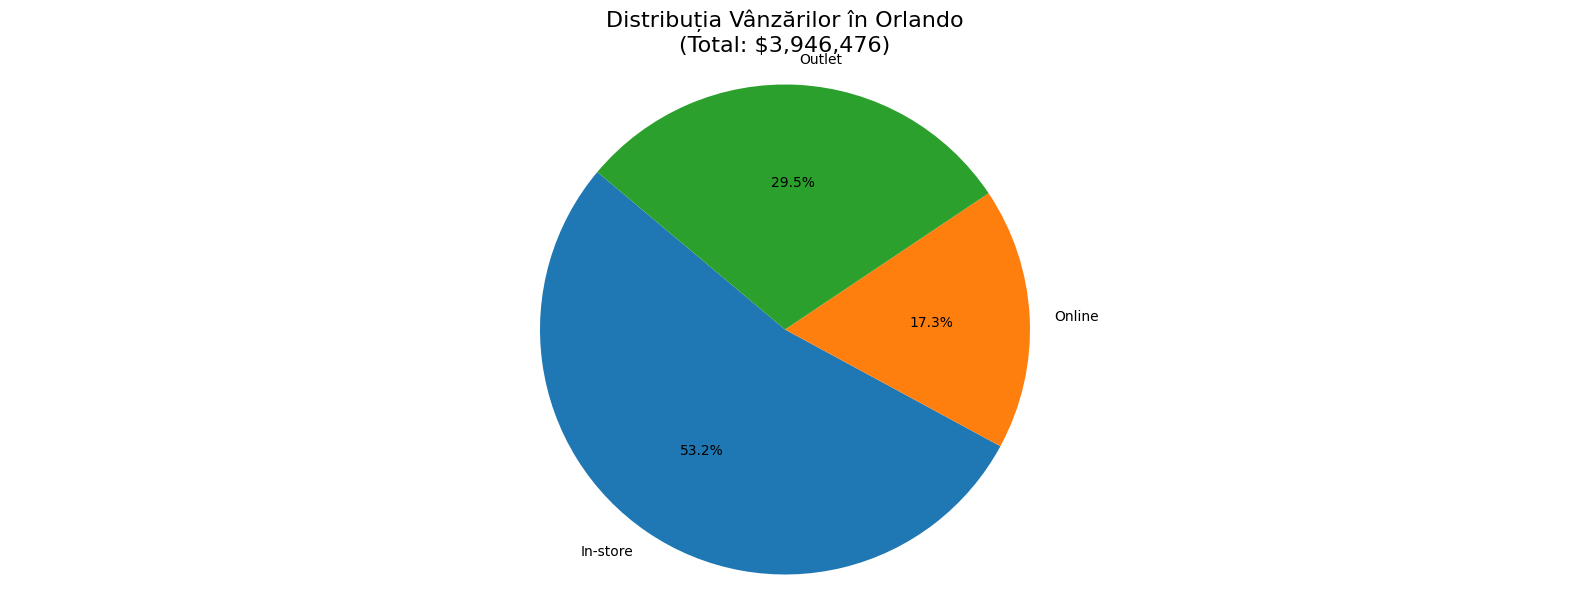

In [23]:
for city in top_cities_by_sales.index:
        
        sales_for_pie = []
        labels_for_pie = []

        for method in all_methods:
            sales = detailed_breakdown.get((city, method), 0)
            if sales > 0:
                sales_for_pie.append(sales)
                labels_for_pie.append(method)

        plt.figure(figsize=(20, 7))    
        plt.pie(
            sales_for_pie, 
            labels=labels_for_pie, 
            autopct='%1.1f%%', 
            startangle=140
        )
        
        total_sales_for_city = top_cities_by_sales.loc[city]
    
        plt.title(f"Distribuția Vânzărilor în {city}\n(Total: ${total_sales_for_city:,.0f})", fontsize=16)
        
        
        plt.axis('equal')
        
        plt.show()

**Cu ajutorul acetui Pie Charturilor putem observa cu usurinta distributia vanzarilor in functie de modalitate de vanzare pentru primele 5 orase in functie de totalul de vanzari**  
**Pentru orasul de pe primul loc, New York, majoritatea vanzarilor sunt facute in outlet in proportie de 76,5%, 17% Online si 6% In store**  
**In San Francisco 83 % din vanzari sunt facute in Outlet, aici se poate observa ca in acest oras nu sunt magazine oficiale(In-store)**  
**In Charleston 79% din vanzari sunt facute Online, singurul din top 5 in care majoritatea vanzarilor sunt Online**   
**Portland are 49% din vanzari facute in-store si 33% in outlet si 18% Online**   
**Orlando are 53% din vanzari au fost facute in-store , 29,5% in outlet si 17% Online**  

# Machine learning

In [24]:
monthly_sales = subset.groupby('YearMonth')['Total Sales'].sum().reset_index()
unique_retailers=subset.groupby('YearMonth')['Retailer'].nunique()
print(unique_retailers.head())
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()
print(monthly_sales.head(30))
print(f"\nNumărul total de luni în setul de date: {len(monthly_sales)}")

YearMonth
,2020-01    2
,2020-02    2
,2020-03    2
,2020-04    3
,2020-05    4
,Freq: M, Name: Retailer, dtype: int64
,    YearMonth  Total Sales
,0  2020-01-01      2312746
,1  2020-02-01      2140813
,2  2020-03-01      2474202
,3  2020-04-01      3193081
,4  2020-05-01      2164764
,5  2020-06-01      1084194
,6  2020-07-01      2182388
,7  2020-08-01      2641630
,8  2020-09-01      2367686
,9  2020-10-01      1428569
,10 2020-11-01      1168050
,11 2020-12-01      1079202
,12 2021-01-01      7432021
,13 2021-02-01      6123040
,14 2021-03-01      5220782
,15 2021-04-01      6498339
,16 2021-05-01      8576956
,17 2021-06-01      8718953
,18 2021-07-01     10368031
,19 2021-08-01      9651596
,20 2021-09-01      8037898
,21 2021-10-01      7110189
,22 2021-11-01      7855390
,23 2021-12-01     10336130
,
,Numărul total de luni în setul de date: 24


**Codul de mai sus este folosit pentru a defini variabilele ce vor urma a fi folosite in analiza predictiva cu scikit**

**Ca si verificare, am printat head-ul pentru numarul de retaileri unici si vanzarile totale pentru ziua 1 a fiecarei luni**

   YearMonth  Total Sales
,0 2020-01-01      2312746
,1 2020-02-01      2140813
,2 2020-03-01      2474202
,3 2020-04-01      3193081
,4 2020-05-01      2164764


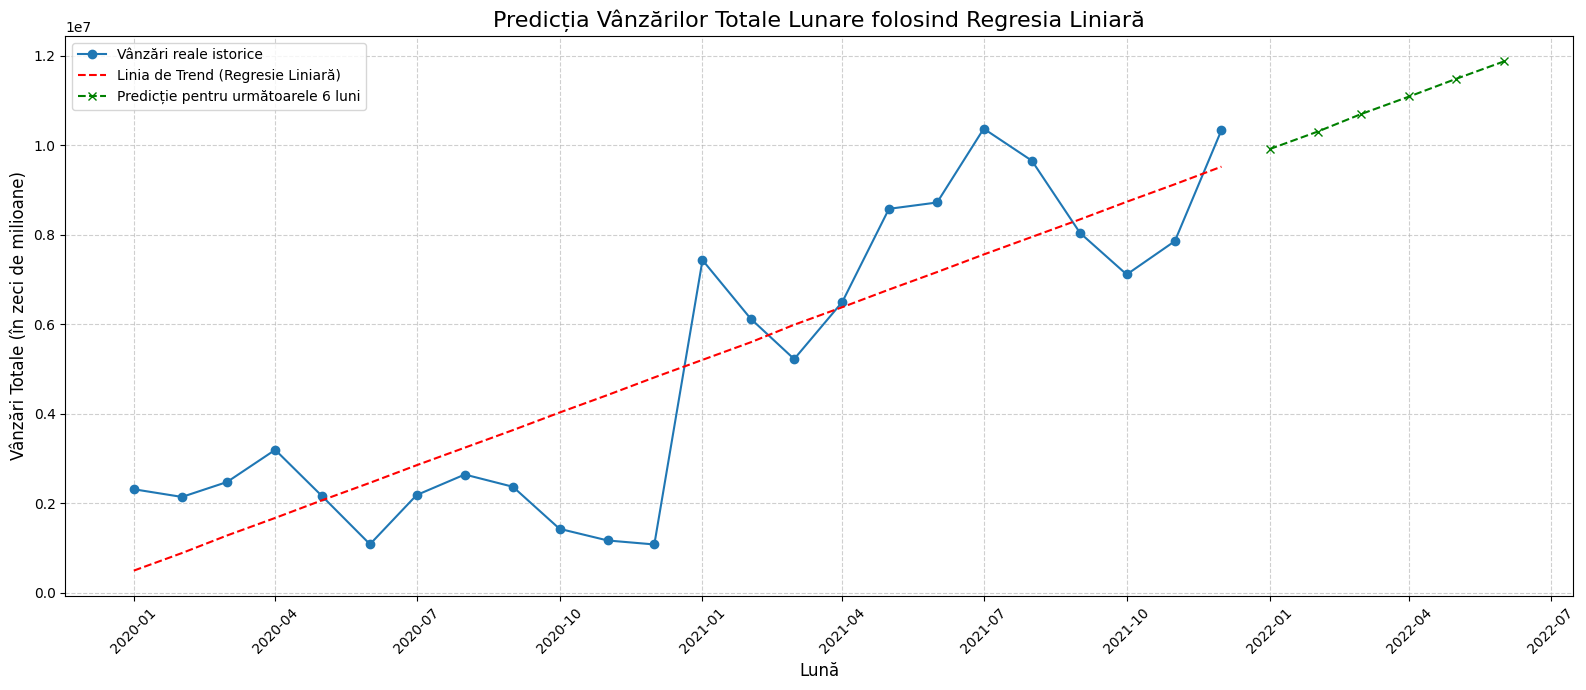

Predicțiile pentru următoarele 6 luni:
,Luna viitoare +1: $9,911,267.26
,Luna viitoare +2: $10,303,613.14
,Luna viitoare +3: $10,695,959.02
,Luna viitoare +4: $11,088,304.90
,Luna viitoare +5: $11,480,650.78
,Luna viitoare +6: $11,872,996.67


In [25]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    print(monthly_sales.head())


X = np.arange(len(monthly_sales)).reshape(-1, 1)
y = monthly_sales['Total Sales']

model = LinearRegression()
model.fit(X, y)
sales_trend = model.predict(X)
num_future_months = 6
X_future = np.arange(len(monthly_sales), len(monthly_sales) + num_future_months).reshape(-1, 1)
future_predictions = model.predict(X_future)
future_months_dates = [monthly_sales['YearMonth'].iloc[-1] + pd.DateOffset(months=i) for i in
                       range(1, num_future_months + 1)]

plt.figure(figsize=(16,7))

plt.plot(monthly_sales['YearMonth'], y, marker='o', linestyle='-', label='Vânzări reale istorice')


plt.plot(monthly_sales['YearMonth'], sales_trend, color='red', linestyle='--',
         label='Linia de Trend (Regresie Liniară)')

plt.plot(future_months_dates, future_predictions, color='green', linestyle='--', marker='x',
         label=f'Predicție pentru următoarele {num_future_months} luni')

plt.title('Predicția Vânzărilor Totale Lunare folosind Regresia Liniară', fontsize=16)
plt.xlabel('Lună', fontsize=12)
plt.ylabel('Vânzări Totale (în zeci de milioane)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Predicțiile pentru următoarele 6 luni:")
for i, pred in enumerate(future_predictions):
    print(f"Luna viitoare +{i + 1}: ${pred:,.2f}")

**In graficul de mai sus este prezentata evolutia vanzarilor totale ale retailerilor la inceputul fiecarei luni** 
**Se poate observa o tendinta extrem de mare de crestere de la luna la luna**  
**Totusi, aceasta crestere poate fi inselatoare, deoarece prezinta suma vanzarilor tuturor retailerilor, iar in anul 2020 au fost prezenti mai putini retaileri decat in anul urmator**  
**Cu ajutorul Scikit s-a realizat o predictie pentru valorile estimate ale vanzarilor totale pentru urmatoarele 6 luni**

0   1,156,373.00
,1   1,070,406.50
,2   1,237,101.00
,3   1,064,360.33
,4     541,191.00
,Name: Sales per Retailer, dtype: float64


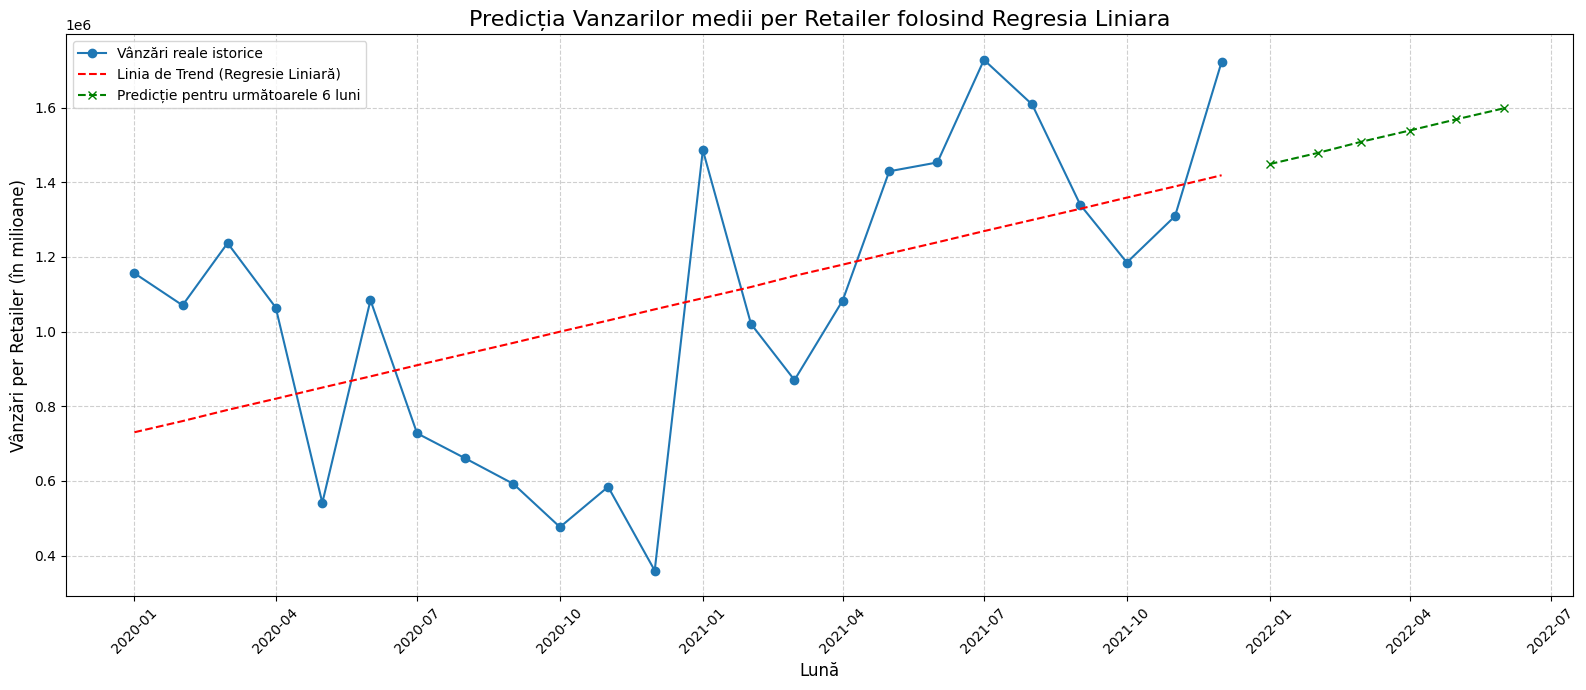

Predicțiile pentru următoarele 6 luni:
,Luna viitoare +1: $1,448,794.38
,Luna viitoare +2: $1,478,733.52
,Luna viitoare +3: $1,508,672.67
,Luna viitoare +4: $1,538,611.82
,Luna viitoare +5: $1,568,550.96
,Luna viitoare +6: $1,598,490.11


In [26]:
monthly_sales = subset.groupby('YearMonth')['Total Sales'].sum().reset_index()
unique_retailers = subset.groupby('YearMonth')['Retailer'].nunique().reset_index()
monthly_sales = monthly_sales.merge(unique_retailers, on='YearMonth')
monthly_sales.rename(columns={'Retailer': 'Unique Retailers'}, inplace=True)
monthly_sales['Sales per Retailer'] = monthly_sales['Total Sales'] / monthly_sales['Unique Retailers']
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()


with pd.option_context('display.float_format', '{:,.2f}'.format):
    print(monthly_sales['Sales per Retailer'].head())
    
X = np.arange(len(monthly_sales)).reshape(-1, 1)
y = monthly_sales['Sales per Retailer']

model = LinearRegression()
model.fit(X, y)
sales_trend = model.predict(X)
num_future_months = 6
X_future = np.arange(len(monthly_sales), len(monthly_sales) + num_future_months).reshape(-1, 1)
future_predictions = model.predict(X_future)
future_months_dates = [monthly_sales['YearMonth'].iloc[-1] + pd.DateOffset(months=i) for i in
                       range(1, num_future_months + 1)]


plt.figure(figsize=(16, 7))

plt.plot(monthly_sales['YearMonth'], y, marker='o', linestyle='-', label='Vânzări reale istorice')


plt.plot(monthly_sales['YearMonth'], sales_trend, color='red', linestyle='--',
         label='Linia de Trend (Regresie Liniară)')

plt.plot(future_months_dates, future_predictions, color='green', linestyle='--', marker='x',
         label=f'Predicție pentru următoarele {num_future_months} luni')

plt.title('Predicția Vanzarilor medii per Retailer folosind Regresia Liniara', fontsize=16)
plt.xlabel('Lună', fontsize=12)
plt.ylabel('Vânzări per Retailer (în milioane)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Predicțiile pentru următoarele 6 luni:")
for i, pred in enumerate(future_predictions):
    print(f"Luna viitoare +{i + 1}: ${pred:,.2f}")

**Graficul acesta este o modificare a graficului anterior, unde am folosit vanzarile per retailer in loc de numarul de vanzari totale, pentru a ameliora impactul diferentei numarului de retaileri asupra analizei in functie de perioada**
**Desi tendinta vanzarilor este tot de crestere, valorile de pe prima jumatate a tabelului beneficiaza de noua modalitate nemaifiind influentata de numarul total de retaileri din acea perioada si astfel panta regresiei este una mult mai putin abrupta in comparatie cu cea anterioara.** 

# Optimizarea afacerii in urma analizei


## Strategia de Optimizare: Dezvoltarea canalului online pentru West Gear


O strategie cheie pentru optimizare, bazată pe analiza datelor, este dezvoltarea accelerată a canalului online pentru retailerul West Gear. Această abordare vizează consolidarea poziției de lider a West Gear prin valorificarea unei oportunități semnificative de creștere în mediul digital.

Analiza datelor arată că West Gear este, în prezent, retailerul cu cele mai mari vânzări totale, atingând 32,409,558 de dolari. Cu toate acestea, performanța sa în mediul online este sub potențial. Vânzările online ale West Gear se ridică la 9,503,966 de dolari, fiind depășite de competitori precum Foot Locker, care a generat 12,233,565 de dolari din vânzări online, și Sports Direct, cu 10,013,772 de dolari. 

Această diferență de aproximativ 2.7 milioane de dolari față de liderul online (Foot Locker) indică o zonă clară de îmbunătățire.

Implementarea acestei strategii ar aduce beneficii pentru West Gear. În primul rând, ar consolida poziția sa de lider pe piață. Prin atingerea și depășirea performanței online a competitorilor, West Gear și-ar mări avansul total, devenind un jucător și mai dominant. În al doilea rând, ar reduce dependența de un singur canal de vânzare; în prezent, aproape jumătate din veniturile West Gear provin din magazinele fizice (15,672,650 de dolari). 

O prezență online mai puternică ar diversifica sursele de venit și ar asigura o reziliență mai mare a afacerii. În cele din urmă, ar permite West Gear să atragă un segment mai larg de clienți care preferă cumpărăturile online, contribuind la o creștere sustenabilă pe termen lung.


## Strategie de optimizare pentru toti retailerii:


Cresterea numarului de vanzari pentru cea mai profitabila categorie de produse:

La nivelul pietei, se observa ca marja de profit pentru Incaltamintea de Strada pentru Barbati si a Imbracamintea sunt semnificativ mai mari decat celelalte categorii (cu 12.5%, respectiv 10% *in raport* cu celelalte categorii). Aceasta marja de profit se observa si in profitul total adus de aceste doua categorii.
Astfel, o strategie buna ar fi o campanie de marketing pentru a atrage mai multi clienti spre aceste doua categorii
    Incaltamintea de Strada Pentru Barbati are parte, pe langa de marja de profit cea mai mare, si de cel mai mare numar de unitati vandute (cu ~37% mai multe decat urmatoare categorie). Fiind cea mai populara categorie, fiecare nou client este in general mai predispus spre a achizitiona produse din aceasta, iar retailerul incaseaza cel mai mare procent posibil din fiecare dolar cheltuit de client, marja de profit fiind cea mai mare dintre categorii
    Imbracamintea pentru Femei este a doua cea mai profitabila categorie, dpdv al marjei de profit. Astfel, o campanie concentrata spre a creste numarul de clienti pentru aceasta categorie ar fi de asemenea o solutie buna ca firma sa retina mai mult profit pentru fiecare dolar cheltuit de client.

In sens opus, o alta strategie posibila ar fi tintirea cresterii marjei de profit a tuturor celorlalte categorii spre o valoare asemanatoare celor doua (De exemplu, desi au fost vandute mai multe produse din categoria Men's Athletic Footwear(435526) decat Women's Apparel(433827), acestea au adus un profit total mai mic cu 2247764 companiilor decat totalul adus de Women's Apparel. In cazul unei marje de profit egale, Men's Athletic Footwear ar fi adus un profit total mai mare companiilor si s-ar fi clasat ca a 2-a categorie)
Totusi, o astfel de initiativa de creste ar preturilor nu este sugerata, pentru ca ar avea ca si consecinta scaderea numarului de vanzari in categoriile afectate.



# Concluzie

In urma analizei efectuate, s-au constientizat factorii care iau parte la succesul economic si la numarul de vanzari atinse si modul in care acestia interactioneaza in cadrul pietei de vanzari de produse Adidas

Fiecare retailer a avut propria sa abordare asupra vanzarii produselor, lucru ce s-a reflectat prin rezultatele sale in urma exercitiului economic (West Gear a prioritizat vanzarile in-store si outlet in detrimentul vanzarilor online, astfel ca, desi au fost detasat in varful clasamentului, Foot Locker a inregistrat semnificativ mai multe vanzari online. Acest lucru ar putea fi justificat fie printr-o neglijare a acestui aspect de catre West Gear sau prin concentrarea Foot Locker spre aceasta zona pe care West Gear nu o controlau)

Fiecare oras a inregistrat propriul sa abordare societala asupra achizitiilor: New York prefera vanzarile in Outlet, San Francisco la fel, cu mentiunea ca acolo nu au fost prezente magazine; In Charleston, vanzarile au avut loc predominant Online, fara prezente in Outlet-uri; Portland si Orlando au avut o structura mai echilibrata a vanzarilor, cu 50% in store, iar restul impartit intre Outlet si Online

In cazul categoriilor de produs, se remarca diferentele intre numarul de vanzari alea categoriei de Men's Street Shoes si celelalte categorii de produse, alaturi de marja de profit semnificativ mai mare a acestei categorii in comparatie cu celelalte
